# Self Organizing Maps

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
# Importing the dataset
# http://archive.ics.uci.edu/ml/datasets/statlog+(australian+credit+approval)
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
dataset.head(15)
# dataset.iloc[:, 1:-1]


,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
5,15571121,0,15.83,0.585,2,8,8,1.500,1,1,2,0,2,100,1,1
6,15726466,1,17.42,6.500,2,3,4,0.125,0,0,0,0,2,60,101,0
7,15660390,0,58.67,4.460,2,11,8,3.040,1,1,6,0,2,43,561,1
8,15663942,1,27.83,1.000,1,2,8,3.000,0,0,0,0,2,176,538,0
9,15638610,0,55.75,7.080,2,4,8,6.750,1,1,3,1,2,100,51,0


In [3]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
X = sc.fit_transform(X)
X


array([[8.42681467e-01, 1.00000000e+00, 1.25263158e-01, ...,
        5.00000000e-01, 5.00000000e-02, 1.21200000e-02],
       [6.96090562e-01, 0.00000000e+00, 1.34135338e-01, ...,
        5.00000000e-01, 8.00000000e-02, 0.00000000e+00],
       [3.88981656e-01, 0.00000000e+00, 2.38045113e-01, ...,
        5.00000000e-01, 1.40000000e-01, 0.00000000e+00],
       ...,
       [4.39420332e-01, 0.00000000e+00, 7.63909774e-02, ...,
        5.00000000e-01, 5.00000000e-02, 0.00000000e+00],
       [8.44034934e-01, 0.00000000e+00, 2.05563910e-01, ...,
        5.00000000e-01, 6.00000000e-02, 1.10000000e-04],
       [1.06907888e-01, 1.00000000e+00, 4.09774436e-01, ...,
        0.00000000e+00, 2.80000000e-01, 0.00000000e+00]])

In [4]:
# Training the SOM
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len=15, sigma=1.0, learning_rate=0.5)
som.random_weights_init(X)
som.train_random(data=X, num_iteration=100)


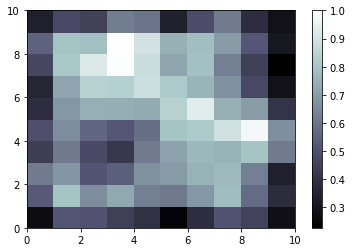

In [5]:
# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
show()


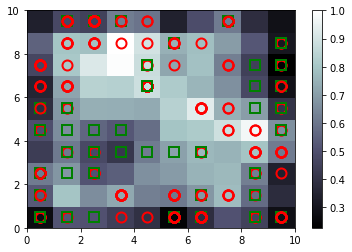

In [6]:
# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor=colors[y[i]],
         markerfacecolor='None',
         markersize=10,
         markeredgewidth=2)
show()


In [7]:
# Finding the frauds
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(0, 4)], mappings[(1, 3)]), axis=0)
frauds = sc.inverse_transform(frauds)
for client in frauds:
    print(client[0])


15715750.0
15621546.0
15789201.0
15704081.0
15723884.0
15677112.0
15636478.0
15689781.0
15735837.0
15627699.0
15778290.0
15585192.0
15591552.0
15701081.0
15622729.0
15671582.0
15611318.0
15722479.0
15810723.0
15730360.0
15751137.0
15664083.0
15690898.0
15704315.0
15766663.0
15640521.0
15591248.0
15598266.0
15703177.0
15659031.0
15733602.0
15801817.0
15642098.0
15693382.0
15571571.0
15725002.0
15752601.0
15707681.0
15632669.0
15598586.0
15701738.0
15690169.0
15740356.0
15775750.0
15690372.0
15764226.0
15775235.0
15780088.0
15774262.0
15750921.0
15762045.0
15689268.0
15750476.0
15761047.0
15799859.0
15744423.0
15789014.0
15814116.0
15785705.0


---
# SimpSOM

Periodic Boundary Conditions active.
The weights will be initialised randomly.
Training SOM... done!


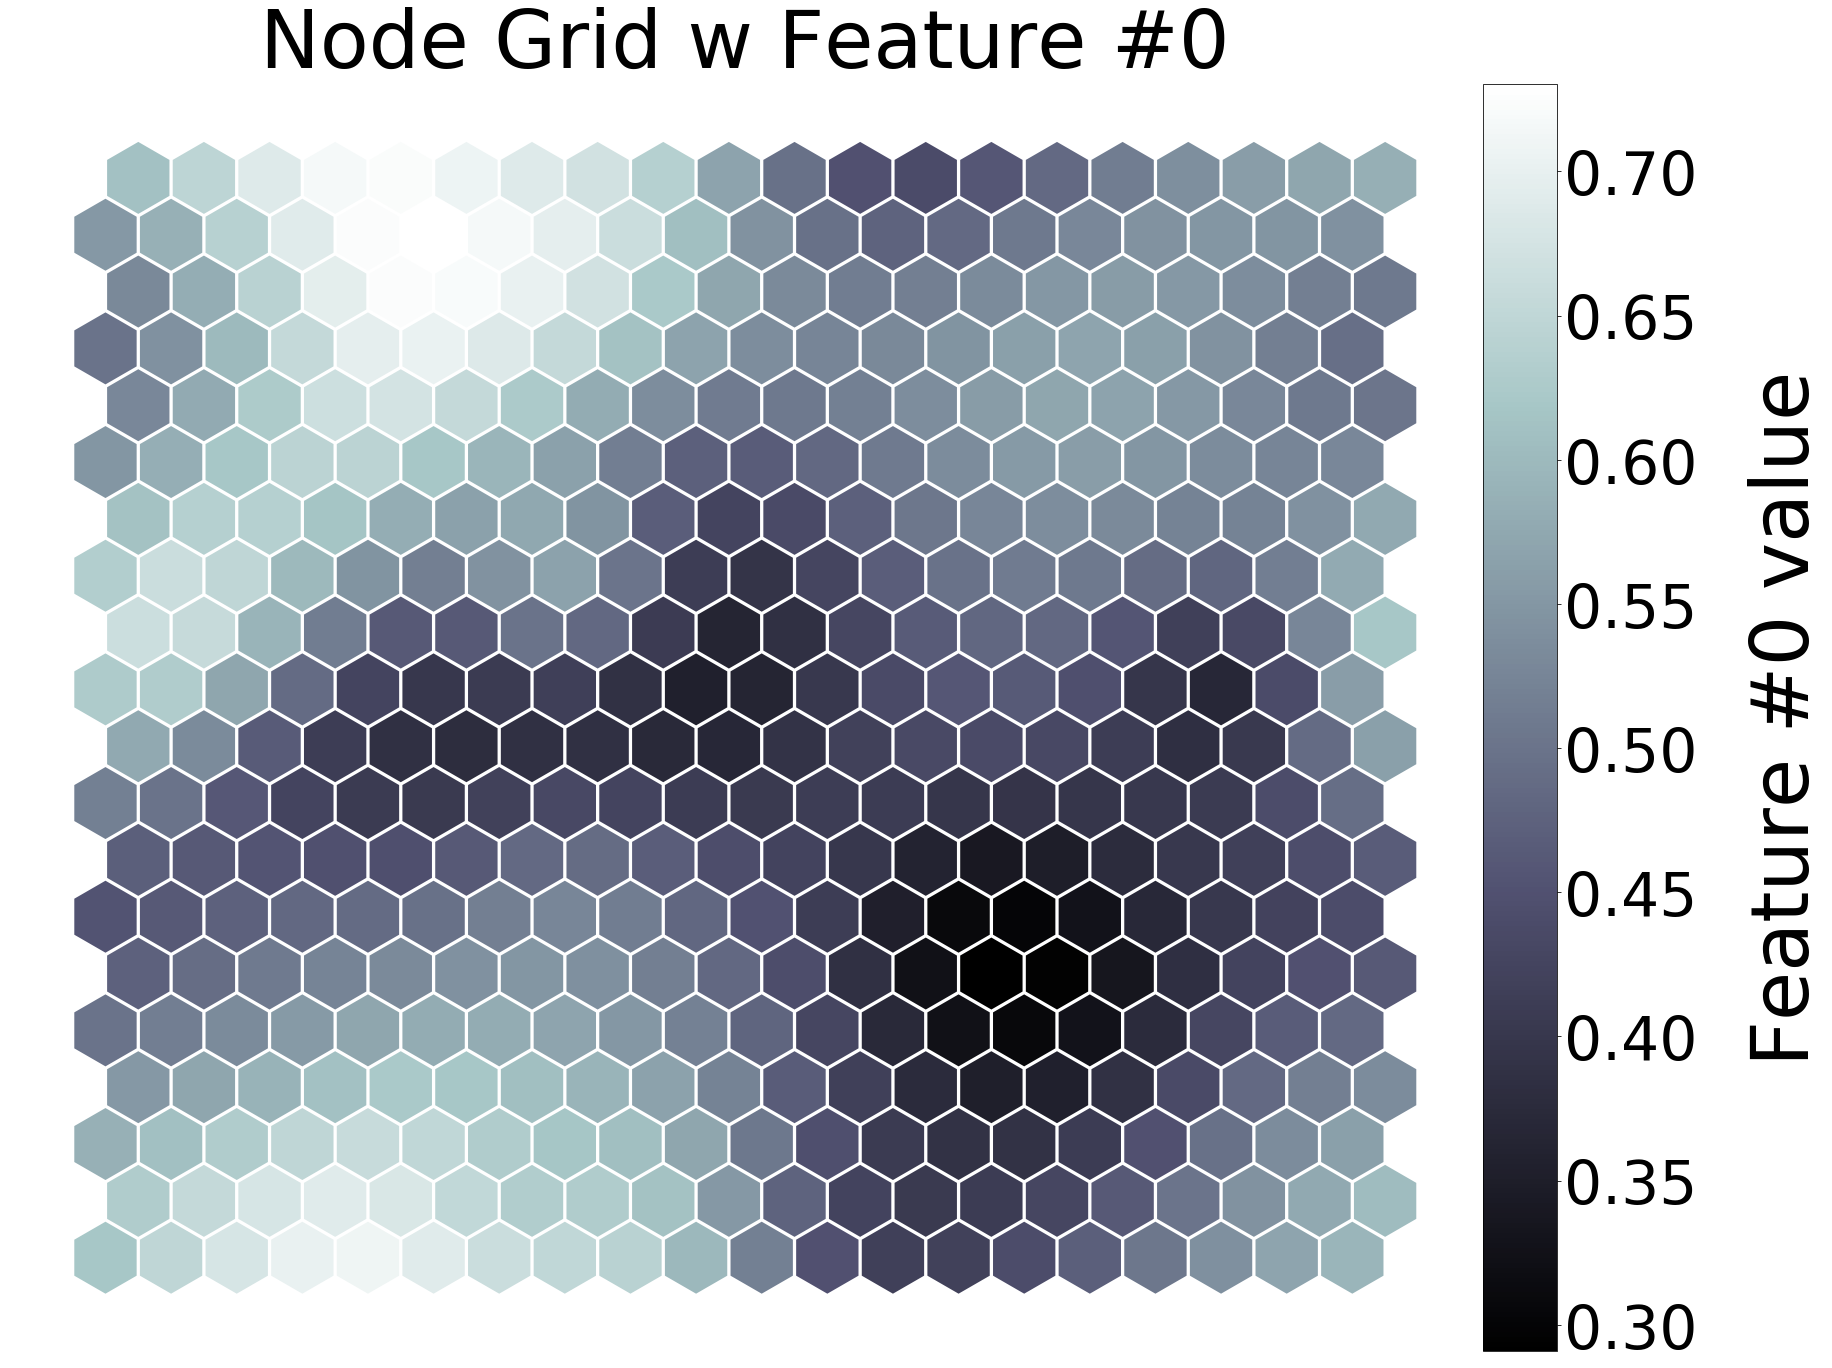

In [8]:
# ! pip install SimpSOM
import pandas as pd
import SimpSOM as sps
from sklearn.cluster import KMeans
import numpy as np

net = sps.somNet(20, 20, X, PBC=True)
net.train(0.5, 100)
# net.save(‘filename_weights’)
net.nodes_graph(colnum=0)


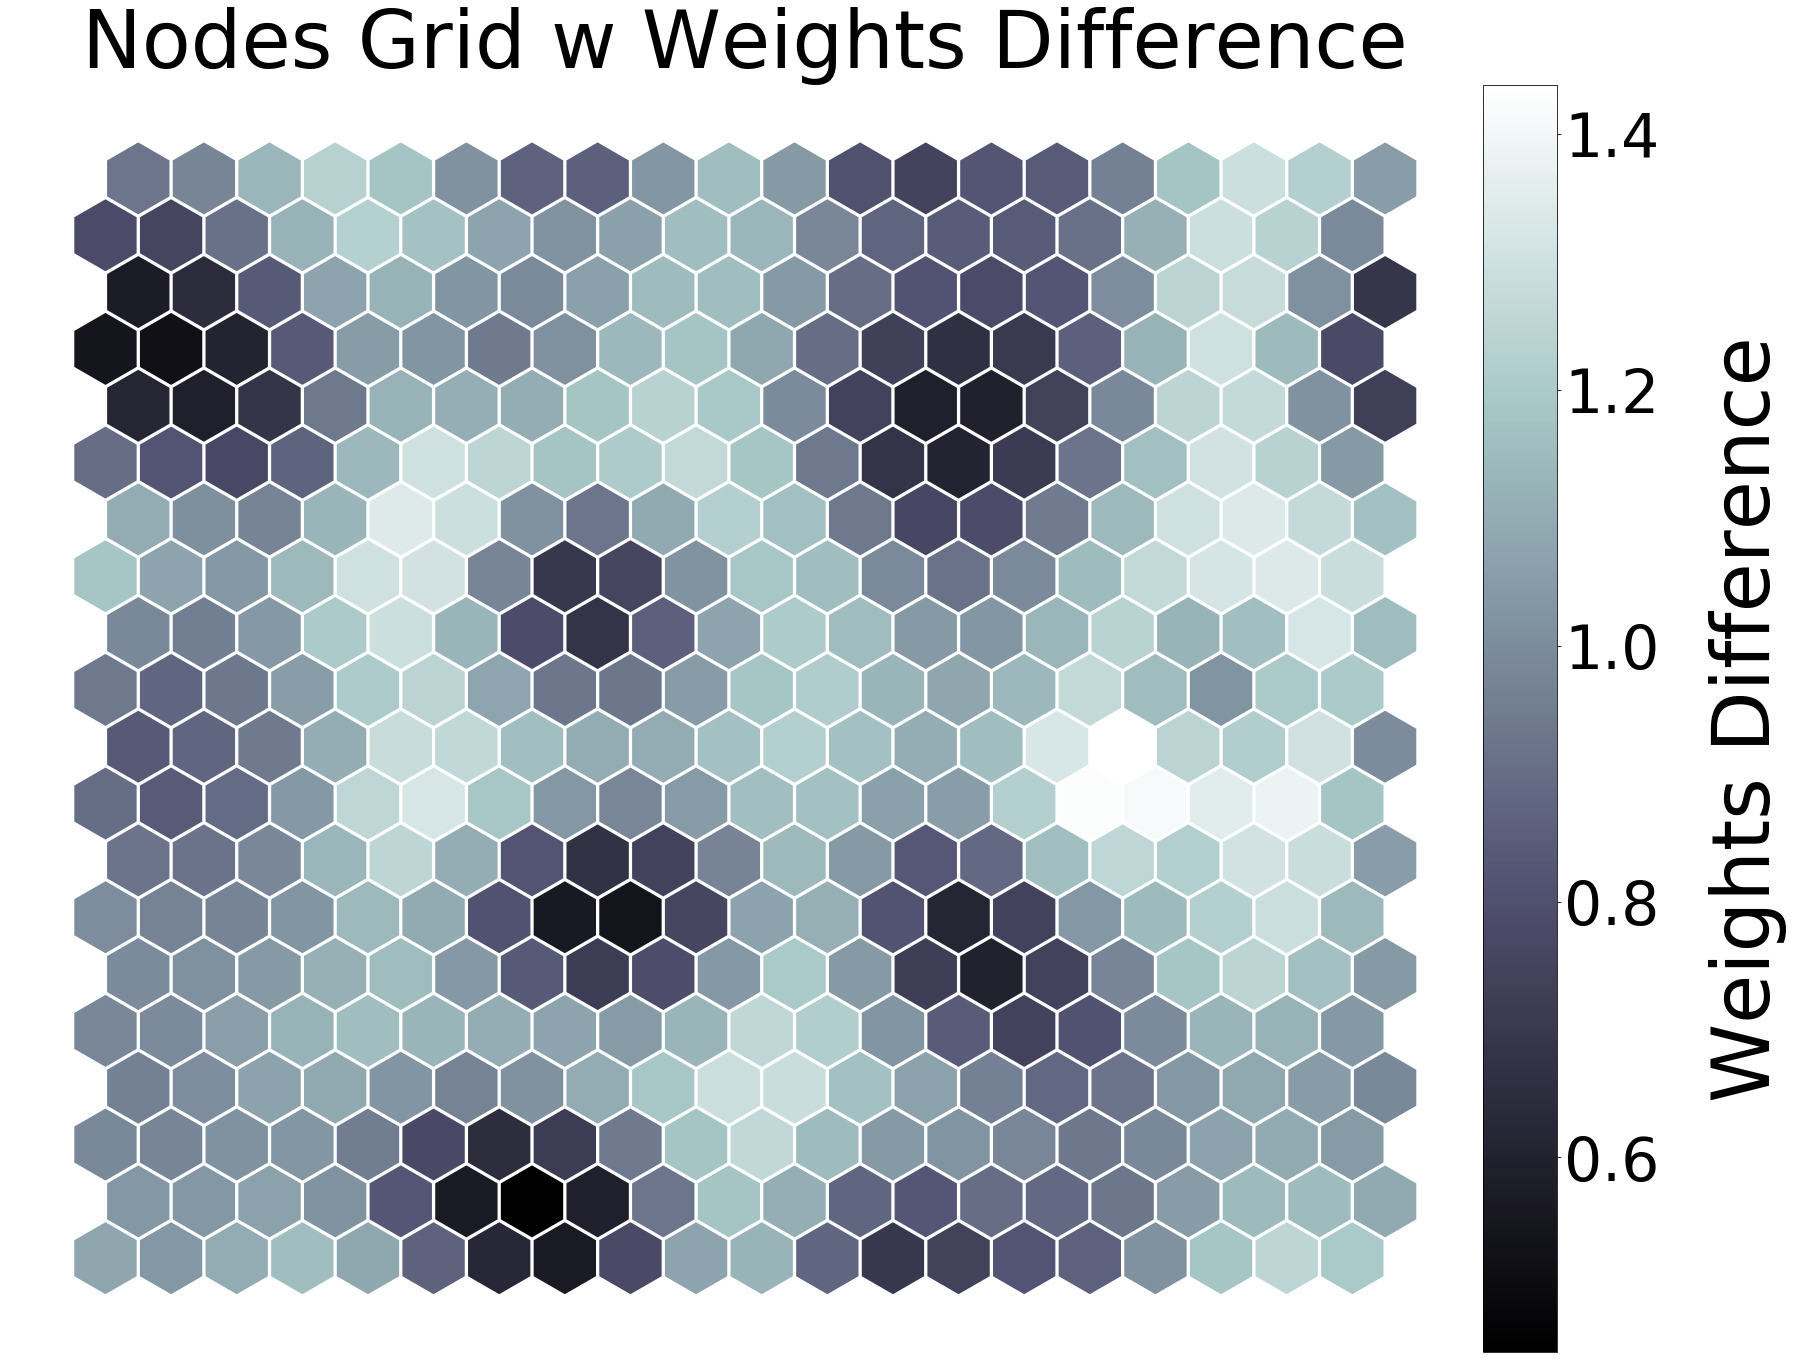

In [9]:
net.diff_graph()


In [10]:
# Project the datapoints on the new 2D network map.
net.project(X)


[[6.5, 0.8660254037844388],
 [13, 5.196152422706632],
 [14, 0.0],
 [16.5, 12.99038105676658],
 [0.5, 7.794228634059948],
 [17, 8.660254037844387],
 [7, 5.196152422706632],
 [17, 8.660254037844387],
 [7, 5.196152422706632],
 [16.5, 12.99038105676658],
 [1.5, 12.99038105676658],
 [0.5, 12.99038105676658],
 [0, 13.856406460551021],
 [2, 12.124355652982143],
 [7.5, 0.8660254037844388],
 [8, 5.196152422706632],
 [2, 13.856406460551021],
 [16.5, 9.526279441628825],
 [7, 5.196152422706632],
 [17, 8.660254037844387],
 [13, 5.196152422706632],
 [14.5, 12.99038105676658],
 [7.5, 4.330127018922194],
 [7, 10.392304845413264],
 [8.5, 6.062177826491071],
 [1.5, 12.99038105676658],
 [7, 5.196152422706632],
 [0, 13.856406460551021],
 [17, 8.660254037844387],
 [1, 13.856406460551021],
 [1.5, 12.99038105676658],
 [13, 0.0],
 [6.5, 12.99038105676658],
 [1.5, 12.99038105676658],
 [3, 0.0],
 [3, 5.196152422706632],
 [7, 13.856406460551021],
 [1.5, 12.99038105676658],
 [16.5, 12.99038105676658],
 [17.5, 12.

<Figure size 432x288 with 0 Axes>

In [11]:
# Cluster the datapoints according to the Quality Threshold algorithm.
net.cluster(X, type='qthresh')


[[6,
  8,
  13,
  15,
  18,
  23,
  24,
  26,
  32,
  35,
  36,
  40,
  42,
  44,
  47,
  51,
  52,
  58,
  59,
  65,
  67,
  68,
  70,
  72,
  74,
  75,
  77,
  78,
  80,
  83,
  85,
  89,
  91,
  93,
  95,
  97,
  101,
  102,
  103,
  104,
  106,
  107,
  110,
  119,
  120,
  125,
  127,
  132,
  134,
  136,
  137,
  140,
  143,
  146,
  148,
  150,
  151,
  152,
  153,
  154,
  156,
  157,
  158,
  160,
  164,
  168,
  169,
  173,
  175,
  178,
  179,
  180,
  183,
  184,
  186,
  187,
  191,
  193,
  194,
  195,
  197,
  202,
  205,
  206,
  211,
  216,
  218,
  221,
  224,
  225,
  226,
  227,
  232,
  233,
  239,
  243,
  244,
  247,
  252,
  253,
  257,
  260,
  261,
  264,
  271,
  272,
  274,
  277,
  278,
  279,
  281,
  282,
  286,
  287,
  288,
  290,
  294,
  295,
  297,
  303,
  305,
  307,
  310,
  312,
  314,
  315,
  321,
  323,
  325,
  328,
  331,
  332,
  337,
  339,
  341,
  343,
  349,
  353,
  354,
  356,
  357,
  358,
  359,
  360,
  366,
  367,
  371,
  379,
  

<Figure size 432x288 with 0 Axes>